In [1]:
# Import necessary modules
import os
import numpy as np
import matplotlib.pyplot as plt
import mne
import pickle
from tqdm import tqdm
from scipy import signal
import scipy
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
# def read_eeg(file_path):
#     # Load EEG data into an MNE raw object
#     return mne.io.read_raw_brainvision(file_path, preload=True)

# def set_channel_types(raw):
#     raw.set_channel_types({channel: 'eeg' for channel in raw.ch_names})
#     raw.set_channel_types({"LE":"misc", "RE":"misc"})
#     return raw

# def get_filtered_eeg(file_path):
#     raw = read_eeg(file_path)
#     raw = set_channel_types(raw)
#     # Apply a low-pass filter at 120 Hz
#     raw_lpf = raw.filter(l_freq=1, h_freq=100, fir_design='firwin')
#     raw_filtered = raw_lpf.copy().notch_filter(freqs=50, notch_widths=0.5, method='spectrum_fit')
#     return raw_filtered

In [4]:
# data_path = os.path.join('..', '..', 'data')
# for dir_path, _, file_names in os.walk(data_path):
#     dirs = dir_path.split(os.path.sep)
#     if 'preprocessed' in dirs:
#         for file_name in tqdm(file_names):
#             if os.path.splitext(file_name)[1] == ".vhdr":
#                 file_path = os.path.join(dir_path, file_name)
#                 raw_filtered = get_filtered_eeg(file_path)
#                 dirs[2] = 'filtered_data'
#                 new_dir_path = os.path.join(*dirs)
#                 new_dir_path = os.path.abspath(new_dir_path)
#                 os.makedirs(new_dir_path, exist_ok=True)
#                 new_file_path = os.path.join(new_dir_path, os.path.splitext(file_name)[0] + '.pickle')
# #                 raw_filtered.save(new_file_path, overwrite=True)
#                 with open(new_file_path, mode='wb') as out_file:
#                     pickle.dump(raw_filtered, out_file, protocol=pickle.DEFAULT_PROTOCOL)

In [23]:
from pathlib import Path
data_path = Path('/data0/practical-sose23/brain-age/data/bap/preprocessed/v3.0')
print(len(list(data_path.rglob('*.npy'))))

file_paths = list(data_path.rglob('*.pickle'))
for file_path in file_paths[:1]:
    with open(file_path, mode='rb') as in_file:
        eeg_obj = pickle.load(in_file)
        print('EEG Shape:', eeg_obj.get_data().shape)
        eeg_epochs = mne.make_fixed_length_epochs(eeg_obj, duration=30, preload=True)
        print('Number of parts:', len(eeg_epochs))
        print(eeg_epochs.get_data()[0,:,:].shape)

2944
EEG Shape: (63, 30000)
Not setting metadata
10 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 10 events and 3000 original time points ...
3 bad epochs dropped
Number of parts: 7
(63, 3000)


In [3]:
# file_path = '../../data/healthy_controls/preprocessed/001_rest_preprocessed'
file_path = '/data0/practical-sose23/brain-age/data/bap/raw/healthy_controls/preprocessed/Exp_eyes_closed_vpH38_eyes_closed'

# Load EEG data into an MNE raw object
raw = mne.io.read_raw_brainvision(file_path + '.vhdr', preload=True)


Extracting parameters from /data0/practical-sose23/brain-age/data/bap/raw/healthy_controls/preprocessed/Exp_eyes_closed_vpH38_eyes_closed.vhdr...
Setting channel info structure...
Reading 0 ... 300002  =      0.000 ...   300.002 secs...


/tmp/ipykernel_3831806/2670950836.py:5: RuntimeWarning: No coordinate information found for channels ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 'P1', 'P2', 'C1', 'C2', 'FT9', 'FT10', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'PO9', 'Iz', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'PO10', 'CPz', 'POz']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(file_path + '.vhdr', preload=True)
/tmp/ipykernel_3831806/2670950836.py:5: RuntimeWarning: Not setting positions of 64 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'LE', 'RE', 

In [8]:
bap_channel_names_path = '/data0/practical-sose23/brain-age/data/bap/bap-channel-names.txt'
channel_names = raw.ch_names
# Save each string in a separate line in a txt file
with open(bap_channel_names_path, "w") as file:
    for channel_name in channel_names:
        file.write(channel_name + "\n")

# Read all lines from the txt file and convert them to a list of strings
with open(bap_channel_names_path, "r") as file:
    read_strings = file.read().splitlines()

# Print the list of strings
print(len(read_strings))

65


In [11]:
median_channel = np.median(raw.get_data(), axis=0)
print(median_channel.shape)

(300003,)


In [ ]:
average_channel = raw.get_data().mean(axis=0)

In [25]:
with open('/data0/practical-sose23/brain-age/filtered_data/healthy_controls/preprocessed/Exp_eyes_closed_vpH38_eyes_closed.pickle', mode='rb') as in_file:
    raw_filtered = pickle.load(in_file)

In [6]:
raw.set_channel_types({channel: 'eeg' for channel in raw_filtered.ch_names})
raw.set_channel_types({"LE":"misc", "RE":"misc"})



NameError: name 'raw_filtered' is not defined

Using matplotlib as 2D backend.


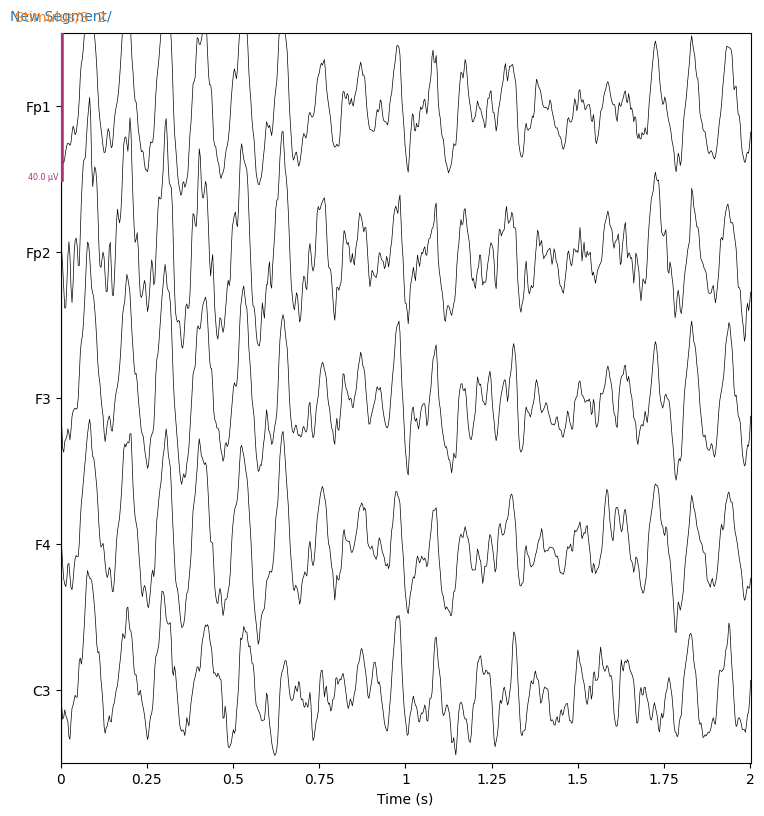

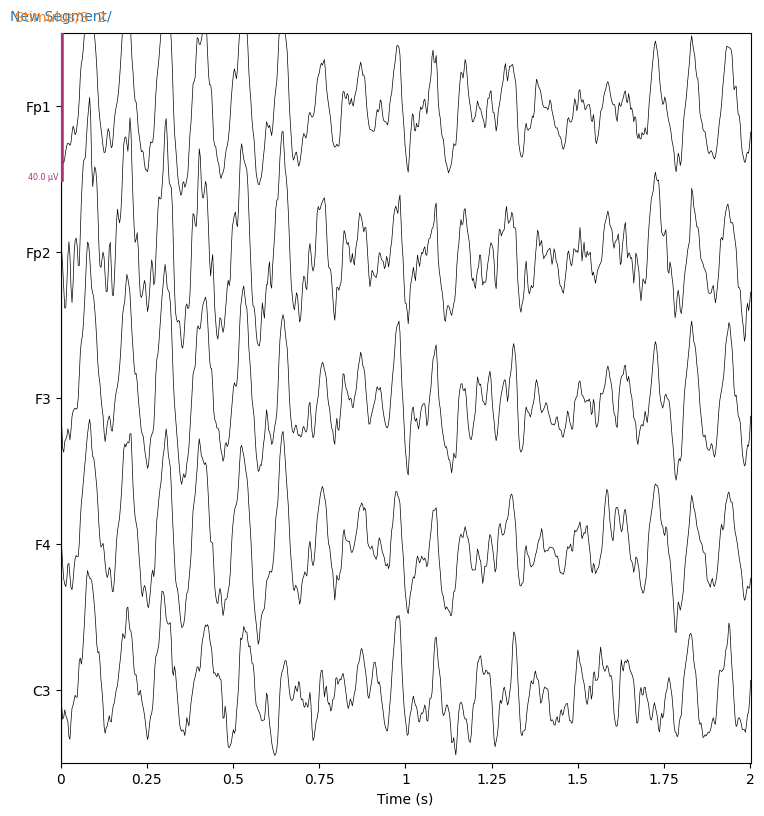

In [8]:
raw_filtered.plot(n_channels=5, start=0, duration=2, show_scrollbars=False)

In [16]:
# Load the standard 10-20 montage (positions of electrodes)
montage = mne.channels.make_standard_montage('standard_1020')

# Set the montage for the raw object
raw.set_montage(montage)

# Set the montage for the raw_filtered object
raw_filtered.set_montage(montage)

<RawBrainVision | Exp_eyes_closed_vpH38_eyes_closed.dat, 65 x 300003 (300.0 s), ~148.9 MB, data loaded>

Effective window size : 0.256 (s)


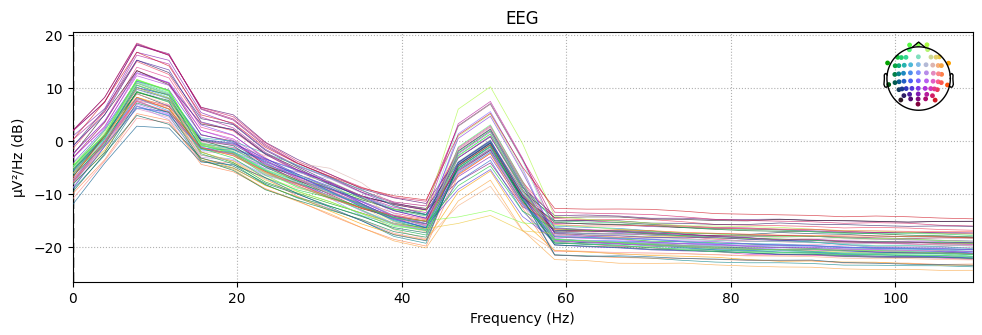

In [10]:
raw.compute_psd(fmax=110).plot()

Effective window size : 0.256 (s)


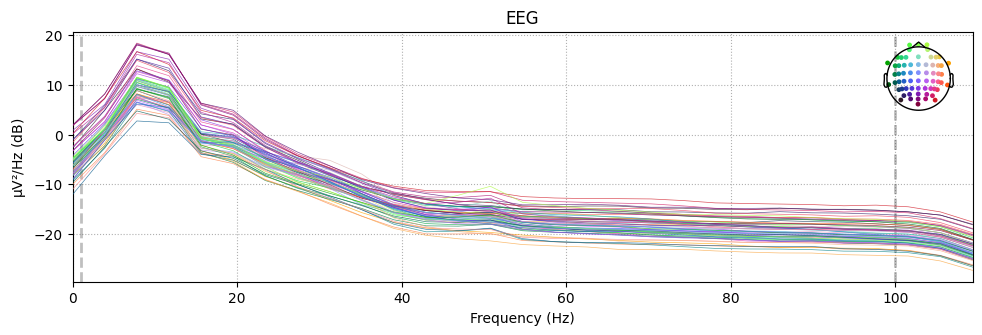

In [11]:
raw_filtered.compute_psd(fmax=110).plot()

In [12]:
# Set the reference to 'average'
raw_filtered.set_eeg_reference(ref_channels='average')

# Select a specific channel
channel_name = 'C3'
raw_filtered.pick_channels([channel_name])

# Extract the data from the raw_filtered object
data, _ = raw_filtered[:]

# Window size for the spectrogram
nperseg = int(2 ** np.ceil(np.log2(raw_filtered.info['sfreq'] * 2)))
# Overlap between adjacent windows
noverlap = int(nperseg * 0.5)

# Compute the spectrogram using the signal.spectrogram function
frequencies, times, spectrogram = signal.spectrogram(
    data,
    fs=raw_filtered.info['sfreq'],  # Sampling frequency of the EEG data
    nperseg=nperseg,
    noverlap=noverlap,
)

# Remove the first dimension of spectrogram
spectrogram = spectrogram[0]

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


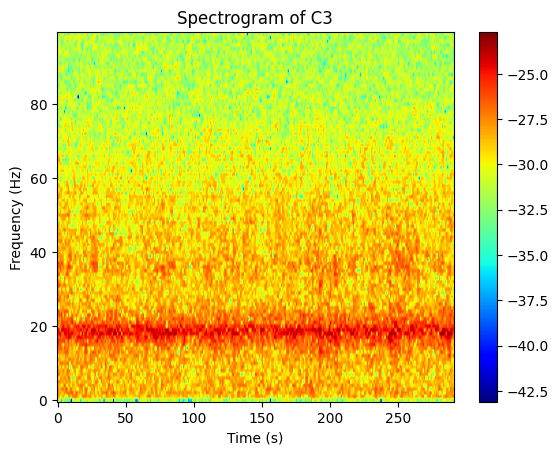

In [16]:
# Plot the spectrogram using matplotlib.pyplot.imshow
plt.figure(1)
plt.imshow(
    np.log(spectrogram)[0:100,:],  # Apply log transformation to improve visualization
    aspect='auto',  # Set aspect ratio to 'auto' to make sure plot fills the whole figure
    cmap='jet',  # Use the 'jet' colormap
    origin='lower',  # Set origin to 'lower' to make sure the first row of the spectrogram corresponds to the lowest frequency
#     extent=[times.min(), times.max(), frequencies.min(), frequencies.max()]  # Set extent of the image to match the time and frequency ranges
)
plt.xlabel('Time (s)')  # Label the x-axis
plt.ylabel('Frequency (Hz)')  # Label the y-axis
plt.colorbar()  # Add a colorbar to the plot
plt.title('Spectrogram of {}'.format(channel_name))  # Set the title of the plot
plt.show()  # Display the plot

In [24]:
print(raw_filtered.info['ch_names'])

['Fp1']


In [26]:
# Set the reference to 'average'
# raw_filtered.set_eeg_reference(ref_channels='average')

# Define channel names
channel_names = ['Fp1', 'Fp2', 'C3', 'C4']

# Create a figure with 4 subplots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15,5))

raw_filtered0 = raw_filtered

# Loop through the channel names and plot the spectrograms
for i, channel_name in enumerate(channel_names):
    raw_filtered = raw_filtered0
    # Select the channel
    raw_filtered.pick_channels([channel_name])
    # Extract the data from the raw_filtered object
    data, _ = raw_filtered[:]
    # Window size for the spectrogram
    nperseg = int(2 ** np.ceil(np.log2(raw_filtered.info['sfreq'] * 2)))
    # Overlap between adjacent windows
    noverlap = int(nperseg * 0.5)
    # Compute the spectrogram using the signal.spectrogram function
    frequencies, times, spectrogram = signal.spectrogram(
        data,
        fs=raw_filtered.info['sfreq'],  # Sampling frequency of the EEG data
        nperseg=nperseg,
        noverlap=noverlap,
    )
    # Remove the first dimension of spectrogram
    spectrogram = spectrogram[0]
    # Plot the spectrogram using matplotlib.pyplot.imshow
    axes[i].imshow(
        np.log(spectrogram)[0:100,:],  # Apply log transformation to improve visualization
        aspect='auto',  # Set aspect ratio to 'auto' to make sure plot fills the whole figure
        cmap='jet',  # Use the 'jet' colormap
        origin='lower',  # Set origin to 'lower' to make sure the first row of the spectrogram corresponds to the lowest frequency
    #     extent=[times.min(), times.max(), frequencies.min(), frequencies.max()]  # Set extent of the image to match the time and frequency ranges
    )
    axes[i].set_xlabel('Time (s)')  # Label the x-axis
    axes[i].set_ylabel('Frequency (Hz)')  # Label the y-axis
    axes[i].set_title('Spectrogram of {}'.format(channel_name))  # Set the title of the plot
    axes[i].set_ylim([0,100]) # Set the y-axis limit to zoom in on the lower frequencies
    axes[i].set_yticks([0, 20, 40, 60, 80, 100]) # Set the y-axis ticks
    axes[i].set_xticks([]) # Remove the x-axis ticks

plt.tight_layout() # Adjust the spacing between subplots
plt.show()  # Display the plot

ValueError: No channels match the selection.

In [26]:
spectrogram.shape

avg_freq = np.mean(spectrogram, axis=1)
avg_freq.shape

np.argmax(avg_freq)

18

In [6]:
channel_types = raw_filtered.get_channel_types()
for idx, name in enumerate(raw_filtered.ch_names):
    channel_type = channel_types[idx]
    print(f"Channel {name} has type {channel_type}")

Channel Fp1 has type eeg
Channel Fp2 has type eeg
Channel F3 has type eeg
Channel F4 has type eeg
Channel C3 has type eeg
Channel C4 has type eeg
Channel P3 has type eeg
Channel P4 has type eeg
Channel O1 has type eeg
Channel O2 has type eeg
Channel F7 has type eeg
Channel F8 has type eeg
Channel T7 has type eeg
Channel T8 has type eeg
Channel P7 has type eeg
Channel P8 has type eeg
Channel Fz has type eeg
Channel Cz has type eeg
Channel Pz has type eeg
Channel Oz has type eeg
Channel FC1 has type eeg
Channel FC2 has type eeg
Channel CP1 has type eeg
Channel CP2 has type eeg
Channel FC5 has type eeg
Channel FC6 has type eeg
Channel CP5 has type eeg
Channel CP6 has type eeg
Channel TP9 has type eeg
Channel TP10 has type eeg
Channel LE has type misc
Channel RE has type misc
Channel P1 has type eeg
Channel P2 has type eeg
Channel C1 has type eeg
Channel C2 has type eeg
Channel FT9 has type eeg
Channel FT10 has type eeg
Channel AF3 has type eeg
Channel AF4 has type eeg
Channel FC3 has type

Effective window size : 0.256 (s)


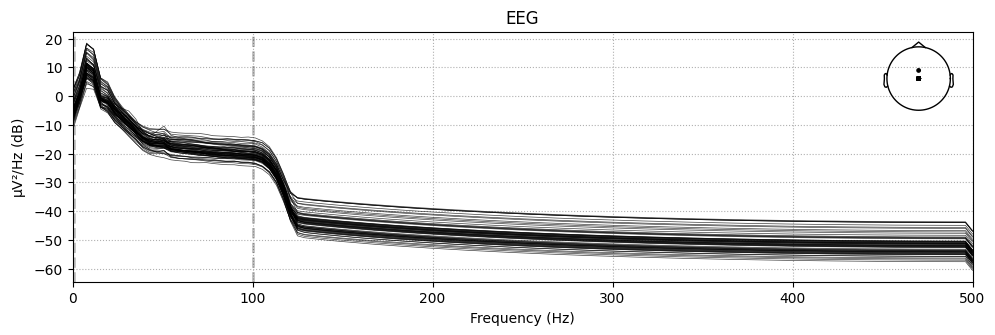

In [8]:
raw_filtered.compute_psd().plot()

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.25
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.00 Hz)
- Upper passband edge: 50.75 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 51.00 Hz)
- Filter length: 6601 samples (6.601 sec)

Effective window size : 0.256 (s)
Effective window size : 0.256 (s)


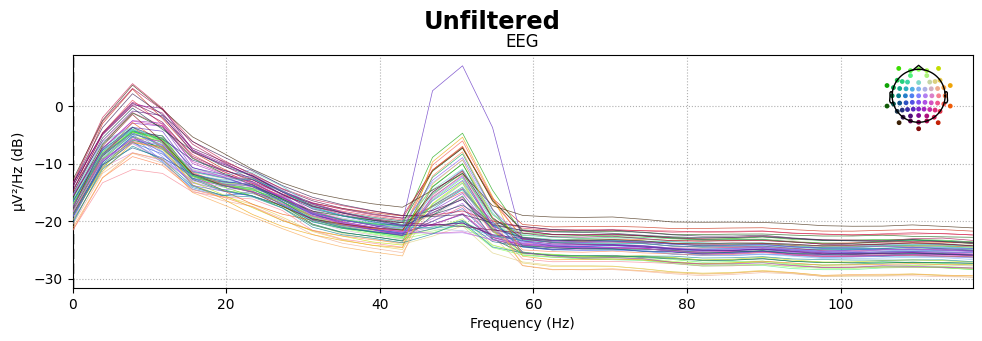

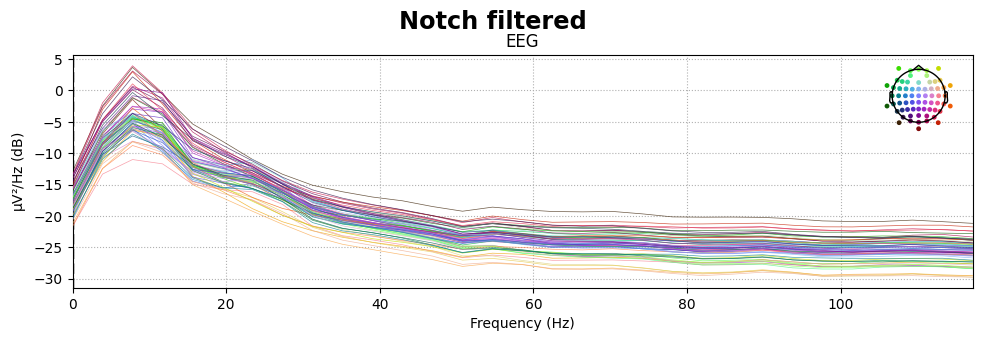

In [96]:
# freqs = (50, 150, 250, 350, 450)

# Apply a low-pass filter at 120 Hz
raw_filtered = raw.filter(l_freq=None, h_freq=120, fir_design='firwin')

raw_notch = raw_filtered.copy().notch_filter(freqs=50, notch_widths=0.5)
for title, data in zip(['Un', 'Notch '], [raw, raw_notch]):
    # Compute the power spectral density
    fig = data.compute_psd(fmax=120).plot() # , xscale='log', average=True
    fig.subplots_adjust(top=0.85)
    fig.suptitle('{}filtered'.format(title), size='xx-large', weight='bold')
    


In [88]:
# meg_picks = mne.pick_types(raw.info, eeg=True)
# freqs = (50, 150, 250, 350, 450)

# Apply a low-pass filter at 120 Hz
raw_filtered = raw.filter(l_freq=None, h_freq=120, fir_design='firwin')

raw_notch = raw_filtered.copy().notch_filter(freqs=50, notch_widths=0.5) # , picks=meg_picks
for title, data in zip(['Un', 'Notch '], [raw, raw_notch]):
    # Compute the power spectral density
    psd = data.compute_psd(fmax=120)
#     psd.subplots_adjust(top=0.85)
    psd.suptitle('{}filtered'.format(title), size='xx-large', weight='bold')

Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 120.00 Hz
- Upper transition bandwidth: 30.00 Hz (-6 dB cutoff frequency: 135.00 Hz)
- Filter length: 111 samples (0.111 sec)

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.25
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.00 Hz)
- Upper passband edge: 50.75 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 51.00 Hz)
- Filter length: 6601 samples (6.601 sec)

Effective windo

AttributeError: 'Spectrum' object has no attribute 'suptitle'

In [14]:
# for title, data in zip(['Un', 'Notch '], [raw, raw_filtered]):
#     # Compute the power spectral density
#     fig = data.compute_psd(fmax=100).plot()
#     fig.subplots_adjust(top=0.85)
#     fig.suptitle('{}filtered'.format(title), size='xx-large', weight='bold')

Effective window size : 0.256 (s)
Effective window size : 0.256 (s)


In [ ]:
# Compute the power spectral density (PSD) for the selected channel
# psd, freqs = mne.time_frequency.psd_welch(raw, fmin=fmin, n_fft=512, n_overlap=256, picks=channel_name)

data = raw.get_data()
sfreq = raw.info['sfreq']
freqs, psd = mne.time_frequency.psd_array_welch(data, sfreq=sfreq, fmin=2, fmax=30, n_jobs=1)



# # Plot the spectrogram of the selected channel using plot_psd_topo()
# mne.viz.plot_psd_topo(raw, fmin=fmin, average=False, picks=channel)

# Or plot the spectrogram using plot_psd()
mne.viz.plot_psd(psd, freqs, xscale='log', area_mode='range', tmax=None, average=False, picks=channel)

# raw.plot(n_channels=64, show_scrollbars=False)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 2 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Filter length: 1651 samples (1.651 sec)

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 2.048 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


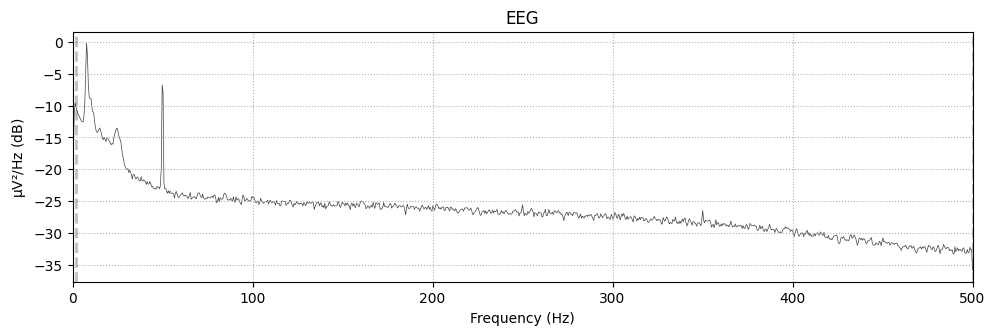

In [5]:
channel_name = 'Fp1'

# raw_notch = raw.copy().notch_filter(freqs=np.array([50, 150, 250, 350]), notch_widths=1, fir_design='firwin2')
raw_notch = raw.copy().filter(l_freq=2, h_freq=None)
raw_notch.plot_psd(picks=channel_name)

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 2.048 (s)


/tmp/ipykernel_2210908/3285624344.py:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_filtered.plot_psd(picks=channel_name)


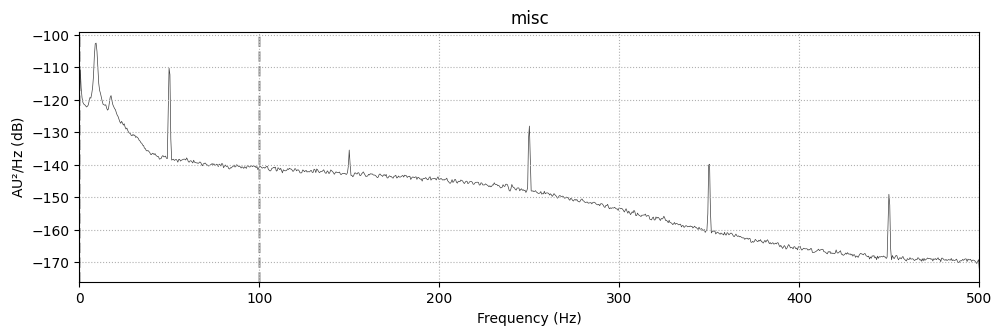

In [26]:
channel_name = 'Fp1'
raw_filtered.plot_psd(picks=channel_name)

In [21]:
raw_filtered.info

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T7, T8, P7, ...
 chs: 64 misc, 1 EEG
 custom_ref_applied: False
 dig: 4 items (3 Cardinal, 1 EEG)
 highpass: 0.0 Hz
 lowpass: 100.0 Hz
 meas_date: unspecified
 nchan: 65
 projs: []
 sfreq: 1000.0 Hz
>

In [24]:
# types = raw_filtered.get_channel_types()
# for idx, name in enumerate(raw_filtered.ch_names):
#     type = types[idx]
#     print(f"Channel {name} has type {type}")

Channel Fp1 has type misc
Channel Fp2 has type misc
Channel F3 has type misc
Channel F4 has type misc
Channel C3 has type misc
Channel C4 has type misc
Channel P3 has type misc
Channel P4 has type misc
Channel O1 has type misc
Channel O2 has type misc
Channel F7 has type misc
Channel F8 has type misc
Channel T7 has type misc
Channel T8 has type misc
Channel P7 has type misc
Channel P8 has type misc
Channel Fz has type misc
Channel Cz has type misc
Channel Pz has type misc
Channel Oz has type misc
Channel FC1 has type misc
Channel FC2 has type misc
Channel CP1 has type misc
Channel CP2 has type misc
Channel FC5 has type misc
Channel FC6 has type misc
Channel CP5 has type misc
Channel CP6 has type misc
Channel TP9 has type misc
Channel TP10 has type misc
Channel LE has type misc
Channel RE has type misc
Channel P1 has type misc
Channel P2 has type misc
Channel C1 has type misc
Channel C2 has type misc
Channel FT9 has type misc
Channel FT10 has type misc
Channel AF3 has type misc
Channel 

In [7]:
file_path_csv = '/data0/practical-sose23/brain-age/data/hbn/raw/NDARZZ830JM7/RSEEG/NDARZZ830JM7/EEG/raw/csv_format/RestingState_data.csv'
file_path_mat = '/data0/practical-sose23/brain-age/data/hbn/raw/NDARZZ830JM7/RSEEG/NDARZZ830JM7/EEG/raw/mat_format/RestingState.mat'
# Load EEG data into an MNE raw object
# raw = mne.io.read_raw_brainvision(file_path + '.vhdr', preload=True)

# raw = scipy.io.loadmat(file_path)

In [13]:
# %%timeit
import time
start_time = time.time()

# raw_data = pd.read_csv(file_path)
# raw_data = mne.io.read_raw(file_path_mat)
raw_data = scipy.io.loadmat(file_path_mat)
# Calculate the elapsed time in seconds
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

Execution time: 0.850743293762207 seconds


In [49]:
print(raw_data['EEG'][0].dtype.names)

('setname', 'filename', 'filepath', 'subject', 'group', 'condition', 'session', 'comments', 'nbchan', 'trials', 'pnts', 'srate', 'xmin', 'xmax', 'times', 'data', 'icaact', 'icawinv', 'icasphere', 'icaweights', 'icachansind', 'chanlocs', 'urchanlocs', 'chaninfo', 'ref', 'event', 'urevent', 'eventdescription', 'epoch', 'epochdescription', 'reject', 'stats', 'specdata', 'specicaact', 'splinefile', 'icasplinefile', 'dipfit', 'history', 'saved', 'etc', 'nbchans')


In [93]:
sfreq = raw_data['EEG'][0]['srate'][0][0][0]

In [135]:
raw_data['__version__']

'1.0'

In [ ]:
info = mne.create_info(ch_names = ch_names, sfreq = sfreq)
raw = mne.io.RawArray(data, info)

In [73]:
print(raw_data['EEG'][0]['data'][0])

[[220853.390625   220853.390625   220853.390625   ... 220853.390625
  220853.390625   220853.390625  ]
 [-17004.01171875 -16998.921875   -16997.06835938 ... -20132.69726562
  -20128.67773438 -19959.93945312]
 [ -9953.69140625  -9948.07714844  -9946.09960938 ... -12574.43652344
  -12574.89160156 -11637.6171875 ]
 ...
 [-10485.82421875 -10482.02246094 -10494.5078125  ...  -5899.05029297
   -5886.93798828  -5200.60351562]
 [-20709.27929688 -20709.39453125 -20714.68164062 ... -24631.93164062
  -24631.9375     -24438.21875   ]
 [     0.              0.              0.         ...      0.
       0.              0.        ]]


In [5]:
raw_data

,2.2085e+05,2.2085e+05.1,2.2085e+05.2,2.2085e+05.3,2.2085e+05.4,2.2085e+05.5,2.2085e+05.6,2.2085e+05.7,2.2085e+05.8,2.2085e+05.9,...,2.2085e+05.170268,2.2085e+05.170269,2.2085e+05.170270,2.2085e+05.170271,2.2085e+05.170272,2.2085e+05.170273,2.2085e+05.170274,2.2085e+05.170275,2.2085e+05.170276,2.2085e+05.170277
0,-17004.0,-16999.0,-16997.0,-17001.0,-16999.0,-17001.0,-17002.0,-16992.0,-16991.0,-16991.0,...,-20128.0,-20132.0,-20124.0,-20116.0,-20122.0,-20116.0,-20121.0,-20133.0,-20129.0,-19960.0
1,-9953.7,-9948.1,-9946.1,-9943.4,-9943.5,-9946.3,-9946.4,-9944.7,-9944.0,-9942.2,...,-12576.0,-12577.0,-12577.0,-12574.0,-12574.0,-12571.0,-12570.0,-12574.0,-12575.0,-11638.0
2,-12232.0,-12229.0,-12227.0,-12221.0,-12221.0,-12225.0,-12225.0,-12226.0,-12225.0,-12223.0,...,-12626.0,-12626.0,-12630.0,-12629.0,-12626.0,-12626.0,-12620.0,-12622.0,-12626.0,-12207.0
3,-12172.0,-12169.0,-12166.0,-12147.0,-12147.0,-12156.0,-12154.0,-12166.0,-12169.0,-12163.0,...,-11190.0,-11190.0,-11204.0,-11213.0,-11201.0,-11203.0,-11191.0,-11177.0,-11187.0,-10979.0
4,-4447.2,-4446.8,-4445.3,-4440.7,-4441.6,-4443.9,-4445.7,-4449.4,-4448.9,-4446.9,...,-4694.7,-4694.5,-4700.1,-4702.7,-4697.1,-4698.1,-4692.3,-4687.6,-4692.0,-4938.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,-19664.0,-19651.0,-19652.0,-19666.0,-19674.0,-19679.0,-19684.0,-19669.0,-19665.0,-19671.0,...,-22351.0,-22352.0,-22338.0,-22320.0,-22331.0,-22319.0,-22324.0,-22358.0,-22362.0,-23559.0
124,-11184.0,-11169.0,-11140.0,-11158.0,-11155.0,-11170.0,-11173.0,-11166.0,-11165.0,-11169.0,...,-9433.4,-9424.8,-9419.9,-9435.6,-9428.5,-9402.3,-9415.9,-9439.8,-9438.1,-9149.4
125,-10486.0,-10482.0,-10495.0,-10503.0,-10493.0,-10488.0,-10489.0,-10484.0,-10491.0,-10505.0,...,-5871.6,-5877.9,-5860.3,-5857.0,-5879.1,-5870.3,-5882.5,-5899.1,-5886.9,-5200.6
126,-20709.0,-20709.0,-20715.0,-20732.0,-20732.0,-20724.0,-20728.0,-20715.0,-20711.0,-20722.0,...,-24622.0,-24629.0,-24608.0,-24585.0,-24595.0,-24587.0,-24598.0,-24632.0,-24632.0,-24438.0


In [21]:
raw = mne.io.read_epochs_eeglab(file_path)

ValueError: The file does not seem to contain epochs (trials less than 2). You should try using read_raw_eeglab function.

In [4]:
print(type(raw))

<class 'dict'>


In [7]:
raw.keys()

dict_keys(['__header__', '__version__', '__globals__', 'EEG'])

In [17]:
print(raw['EEG'][0][0])

(array([], dtype='<U1'), array([], dtype='<U1'), array([], dtype='<U1'), array([], dtype='<U1'), array([], dtype='<U1'), array([], dtype='<U1'), array([], shape=(0, 0), dtype=uint8), array([], dtype='<U1'), array([[129]], dtype=uint8), array([[0]], dtype=uint8), array([[176955]], dtype=int32), array([[500]], dtype=uint16), array([[0]], dtype=uint8), array([[0]], dtype=uint8), array([[353910]], dtype=int32), array([[220853.390625  , 220853.390625  , 220853.390625  , ...,
        220853.390625  , 220853.390625  , 220853.390625  ],
       [-17004.01171875, -16998.921875  , -16997.06835938, ...,
        -20132.69726562, -20128.67773438, -19959.93945312],
       [ -9953.69140625,  -9948.07714844,  -9946.09960938, ...,
        -12574.43652344, -12574.89160156, -11637.6171875 ],
       ...,
       [-10485.82421875, -10482.02246094, -10494.5078125 , ...,
         -5899.05029297,  -5886.93798828,  -5200.60351562],
       [-20709.27929688, -20709.39453125, -20714.68164062, ...,
        -24631.93

In [3]:
import pickle

file_path = '/data0/practical-sose23/brain-age/data/bap/preprocessed/v1.0/chronic_pain_patients/chronic_back_pain/preprocessed/Exp_eyes_closed_vp42_eyes_closed.pickle'

with open(file_path, mode='rb') as in_file:
    eeg_obj = pickle.load(in_file)

In [4]:
eeg_obj

<RawBrainVision | Exp_eyes_closed_vp42_eyes_closed.dat, 63 x 40501 (300.0 s), ~19.5 MB, data loaded>

Setting 74 of 40501 (0.18%) samples to NaN, retaining 40427 (99.82%) samples.
Effective window size : 1.896 (s)


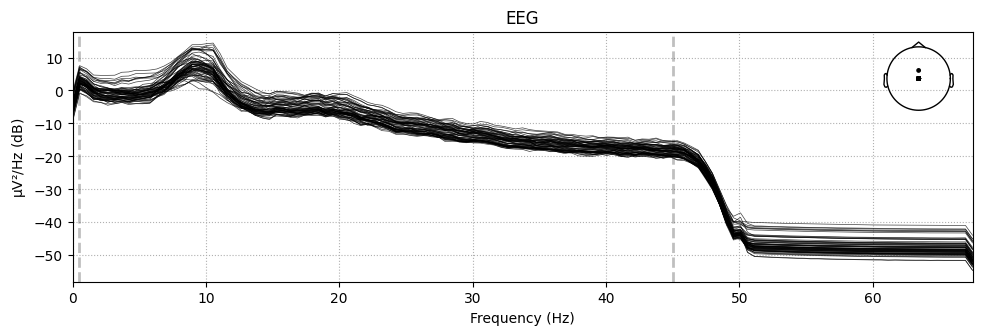

In [6]:
eeg_obj.compute_psd().plot()

In [5]:
from pathlib import Path
dir_preprocessed = Path("/data0/practical-sose23/brain-age/data/hbn/preprocessed/v1.0/")
# dir_preprocessed = Path("/data0/practical-sose23/brain-age/data/hbn/preprocessed")
len(list(dir_preprocessed.rglob("*.pickle")))

2225

In [1]:
from pathlib import Path
dir_preprocessed = Path("/data0/practical-sose23/brain-age/data/hbn/unzipped/")
len(list(dir_preprocessed.rglob("*.mat")))

2260